In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import numpy as np

3.3.1


In [3]:
path = "G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Moth Annotations\Tip Manual Digitization"
trackframe_filename = 'ManualTipTracking_DigitizingChart.xlsx'
frameInfo = pd.read_excel(path + "\\" + trackframe_filename)
frameInfo.head()

,Name,Date,trial,Start,Frame Start,Digitized Start,Stop,Frame Stop,Digitized Stop
0,c-1_m13,2018-03-13,0,11:15:00,20070,20455,12:00:00,21600.0,21200
1,c-1_m13,2018-03-13,last,1900-01-01 16:25:00,72450,72930,1900-01-01 17:09:00,73962.0,73020
2,c-2_m5,2018-02-20,0,12:40:00,22320,22910,13:34:00,24012.0,23660
3,c-2_m5,2018-02-20,last,1900-01-01 11:10:00,63180,63540,1900-01-01 11:42:00,63756.0,63630
4,c-3_m10,2018-03-01,0,11:15:00,20070,20390,12:02:00,21636.0,21150


In [4]:
frameInfo.Name.unique()

array(['c-1_m13', 'c-2_m5', 'c-3_m10', 'c-10_m11', 'c-1_m2', 'c-1_m6',
       'c-2_m1', 'c-2_m11', 'c-3_m1', 'c-3_m6', 'c-10_m3', 'c-10_m6'],
      dtype=object)

# Make uber pandas DF to store all x y tracks

If you have already worked in this dataset, and want to replot, skip to next section.

In [4]:
moth_Name = []
trial = []
x = []
y = []

for name in frameInfo.Name.unique():
    filepath = glob.glob(path + "\\" + "*" + name + "xypts.csv")
    xypts = pd.read_csv(filepath[0])
    
    Useful_frameInfo = frameInfo[frameInfo['Name'] == name]
    
    t0_start = Useful_frameInfo[Useful_frameInfo['trial']==0]['Digitized Start'].values[0]
    t0_stop = Useful_frameInfo[Useful_frameInfo['trial']== 0]['Digitized Stop'].values[0]
    
    trial0 = xypts.loc[t0_start:t0_stop,'pt4_cam1_X':'pt4_cam1_Y']
    
    N = [name] * len(trial0)
    t = ['0'] * len(trial0)
    
    moth_Name.extend(N)
    trial.extend(t)
    x.extend(trial0.pt4_cam1_X.values)
    y.extend(trial0.pt4_cam1_Y.values)
    
    
    tlast_start = Useful_frameInfo[Useful_frameInfo['trial']=='last']['Digitized Start'].values[0]
    tlast_stop = Useful_frameInfo[Useful_frameInfo['trial']== 'last']['Digitized Stop'].values[0]
    
    trial_last = xypts.loc[tlast_start:tlast_stop,'pt4_cam1_X':'pt4_cam1_Y']
    
    N = [name] * len(trial_last)
    t = ['last'] * len(trial_last)
    
    moth_Name.extend(N)
    trial.extend(t)
    x.extend(trial_last.pt4_cam1_X.values)
    y.extend(trial_last.pt4_cam1_Y.values)
    

uber_df = pd.DataFrame({'name': moth_Name, 'trial': trial, 'xpts': x, 'ypts': y}) 

In [5]:
uber_df.tail()

,name,trial,xpts,ypts
10303,c-10_m6,last,NaN,NaN
10304,c-10_m6,last,NaN,NaN
10305,c-10_m6,last,NaN,NaN
10306,c-10_m6,last,NaN,NaN
10307,c-10_m6,last,NaN,NaN


#### Export background image and circle parameters for all moths

In [14]:
# get the bckgrnd Image and store it

pathForVideo = "G:\My Drive\Flower shape Experiment Data\RawVideoData"

for name in frameInfo.Name.unique():
    videopath = glob.glob(pathForVideo + "\**\\" + name + ".mp4", recursive=True)

    vid = cv2.VideoCapture(videopath[0])

    ret = vid.set(1,1)
    print(ret)

    ret, frame = vid.read(1)
    
    # write the frame
    
    cv2.imwrite('.\\dataFolders\\background_images\\' + name + '_bckgrnd_Img.png',frame)

True
True
True
True
True
True
True
True
True
True
True
True


In [15]:
# get the bckgrnd Image and store it

pathForVideo = "G:\My Drive\Flower shape Experiment Data\RawVideoData"

for name in frameInfo.Name.unique():
    videopath = glob.glob(pathForVideo + "\**\\" + name + ".mp4", recursive=True)

    vid = cv2.VideoCapture(videopath[0])

    ret = vid.set(1,1)
    print(ret)

    ret, frame = vid.read(1)
    
    # write the frame
    
    cv2.imwrite('.\\dataFolders\\background_images\\' + name + '_bckgrnd_Img.png',frame)

True
True
True
True
True
True
True
True
True
True
True
True


In [16]:
# load image and get radius and center of image, save as separate csv file

def GetCircle(img):
    
#     from skimage import color
    from skimage.feature import canny
    from skimage.transform import hough_circle, hough_circle_peaks
    
    # img - input has to be a grayscale image
    blurred = cv2.GaussianBlur(img, (5,5), 0)
    # Get the edges
    edges = canny(blurred, sigma=5) 
    # perform the hough transform to get circles of radii close to 100
    hough_radii = np.arange(50, 150, 1)
    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=1)
    return(cx[0], cy[0], radii[0])

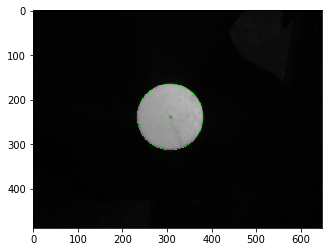

In [17]:
Name = []
circle_x= []
circle_y = []
circle_radius = []

for name in frameInfo.Name.unique():
    pathForImage = glob.glob('./dataFolders/background_images/'+ name + '*.png')
    img = cv2.imread(pathForImage[0],0)
    circ_x, circ_y, circ_radii = GetCircle(img)
    
    Name.extend([name])
    circle_x.extend([circ_x])
    circle_y.extend([circ_y])
    circle_radius.extend([circ_radii])

    # Draw the circle on the image to confirm you have the right thing

    from skimage.draw import circle_perimeter, circle
    from skimage import color
    
    bckgrnd_tmp = color.gray2rgb(img)
    circy, circx = circle_perimeter(circ_y, circ_x, circ_radii)
    bckgrnd_tmp[circ_y-2:circ_y+2, circ_x-2:circ_x+2] = (20, 220, 20)
    bckgrnd_tmp[circy, circx] = (20, 220, 20)
    cv2.imwrite('.\\dataFolders\\background_images\\' + name + '_DetectedCircle.png', bckgrnd_tmp)
    plt.imshow(bckgrnd_tmp, cmap='gray')

circle_params = pd.DataFrame({'name': Name, 'circ_x' : circle_x, 'circ_y': circle_y, 'circ_radii': circle_radius})
circle_params.to_csv('./dataFolders/circle_parameters.csv')

In [18]:
circle_params

,name,circ_x,circ_y,circ_radii
0,c-1_m13,308,240,76
1,c-2_m5,309,238,74
2,c-3_m10,308,239,74
3,c-10_m11,307,239,74
4,c-1_m2,310,241,75
5,c-1_m6,308,238,75
6,c-2_m1,308,238,75
7,c-2_m11,308,238,75
8,c-3_m1,308,239,74
9,c-3_m6,308,239,74


In [19]:
# center all the tracked points to the flower center and calculate r and theta and add to uber dataframe

radius = []
theta = []

for name in frameInfo.Name.unique():
    x = uber_df[uber_df.name == name].xpts.values
    y = uber_df[uber_df.name == name].ypts.values
    
    cent_x = circle_params[circle_params['name'] == name].circ_x.values[0]
    cent_y = circle_params[circle_params['name'] == name].circ_y.values[0]
    centered_x = x - cent_x
    centered_y = y - cent_y
    r = np.linalg.norm([centered_x, centered_y], axis = 0)
    radius.extend(r)
    
    angle = np.arctan2(centered_y,centered_x)*180/np.pi
    copy_theta = pd.Series(data = angle)
    range_theta  = copy_theta.where(copy_theta>0, copy_theta+360)
    theta.extend(range_theta)

In [20]:
uber_df.loc[:,'radius'] = pd.Series(data = radius, index=uber_df.index)
uber_df.loc[:,'theta'] = pd.Series(data = theta, index=uber_df.index)

In [22]:
uber_df.head()

,name,trial,xpts,ypts,radius,theta
0,c-1_m13,0,NaN,NaN,NaN,NaN
1,c-1_m13,0,5.011057,348.049824,321.678510,160.373100
2,c-1_m13,0,20.932432,335.463658,302.524542,161.605573
3,c-1_m13,0,40.568796,325.165885,280.664705,162.335453
4,c-1_m13,0,50.652334,323.449590,270.539563,162.033785


In [23]:
# export uber dataframe as csv

uber_df.to_csv('./dataFolders/compiledTrackData.csv')

### Draw the tracks on bckgrnd frame for all moths

In [41]:
uber_df = pd.read_csv('./dataFolders/compiledTrackData.csv')

for name in frameInfo.Name.unique():
    fig, ax = plt.subplots(2,1, figsize = (20,10))
    ax = ax.ravel()
    
    pathForImage = glob.glob('./dataFolders/background_images/'+ name + '*.png')
    img = cv2.imread(pathForImage[0],0)
    height, width = img.shape
    
    # get the x and y tracks
    x_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].xpts.values
    y_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].ypts.values
    
    x_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].xpts.values
    y_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].ypts.values
                  
    ax[0].imshow(img, 'gray')
    ax[1].imshow(img, 'gray')
                
    t0 = np.arange(len(x_first))
    f0 = ax[0].scatter(x_first, y_first,
                s= 20, alpha = 0.5, 
                c=t0, cmap = "jet")
    fig.colorbar(f0, ax= ax[0], pad =0.02)
    ax[0].plot(x_first, y_first, '-.', c = "whitesmoke", alpha = 0.2)
    
    ax[0].set_xlim(0,width)
    ax[0].set_ylim(height, 0)
    ax[0].set_axis_off()
    ax[0].set_title(name + ' first trial')
                   
    tlast = np.arange(len(x_last))
    flast = ax[1].scatter(x_last, y_last,
                s= 20, alpha = 0.5, 
                c=tlast, cmap = "jet")
    fig.colorbar(flast, ax= ax[1], pad =0.02)
    ax[1].plot(x_last, y_last, '-.', c = "whitesmoke", alpha = 0.2)
    
    ax[1].set_xlim(0,width)
    ax[1].set_ylim(height, 0)
    ax[1].set_axis_off()
    ax[1].set_title(name + ' last trial')
    
    plt.tight_layout()
    plt.savefig('./dataFolders/Figures/TracksVisualization/tracks_' + name + '.svg', bbox_inches = 'tight')
    fig.clf()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## If you have already worked on this dataset and want to replot, start here!

# Draw radius as function of time

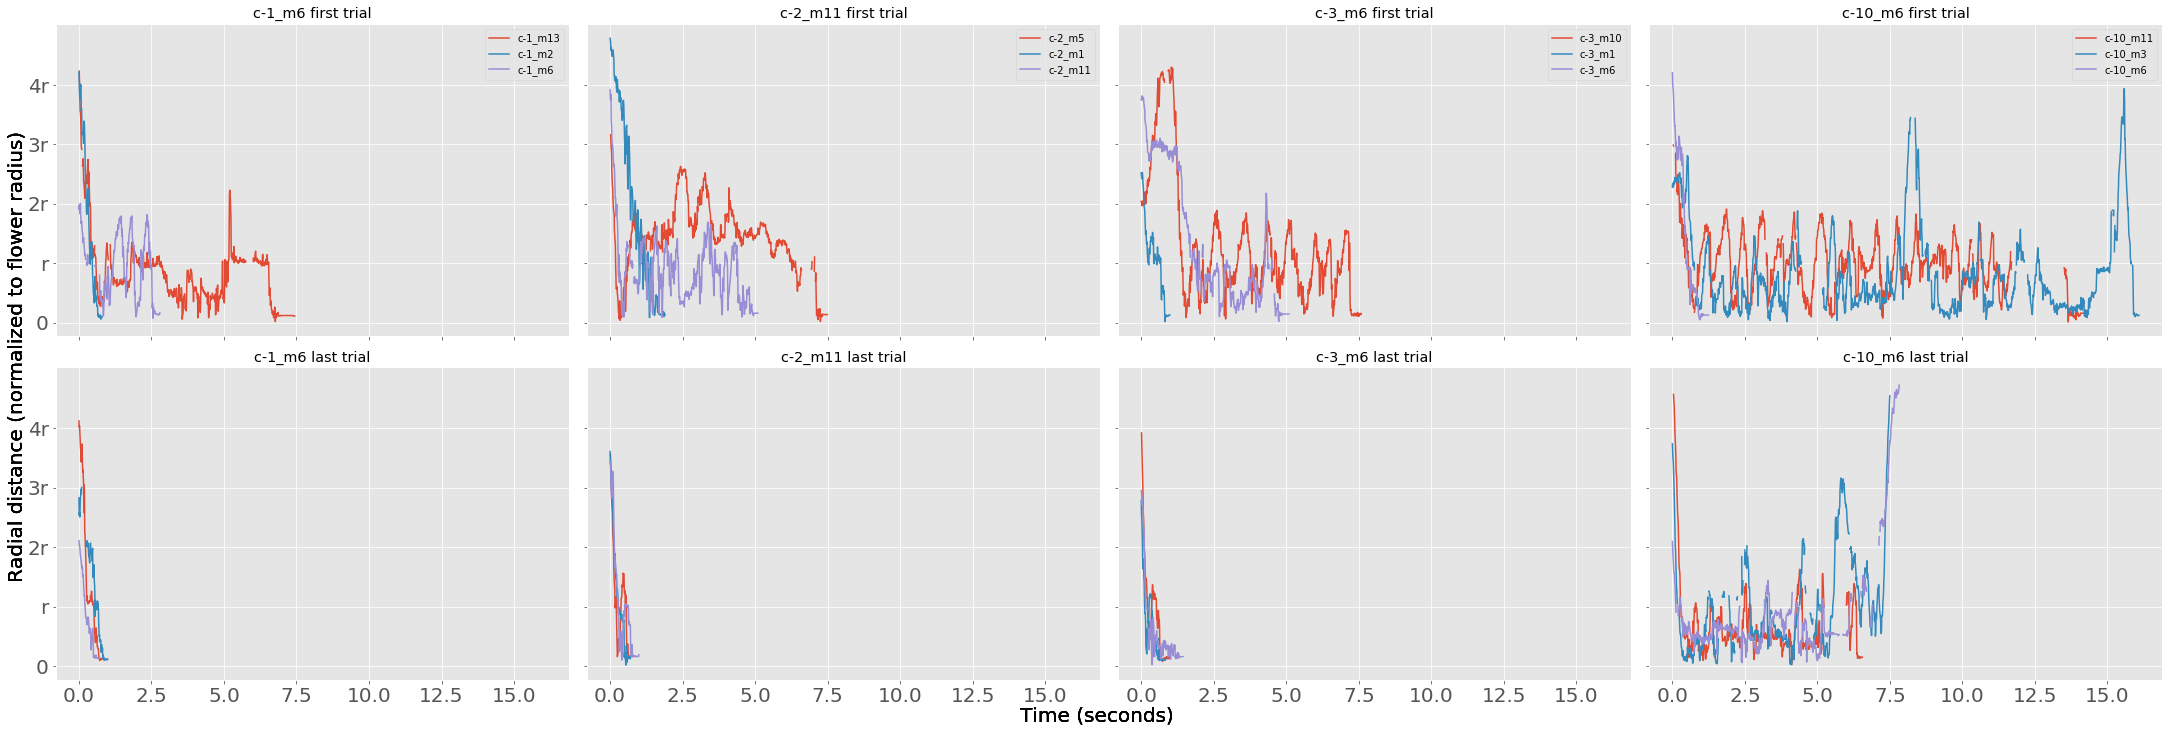

In [6]:
# import cmocean
plt.style.use('ggplot')
from cycler import cycler
# import matplotlib.cm as cm
import matplotlib as mpl

fig, ax = plt.subplots(2,4, sharex = True, sharey = True, figsize = (30,10))

uber_df = pd.read_csv('./dataFolders/compiledTrackData.csv')
circle_params = pd.read_csv('./dataFolders/circle_parameters.csv')

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
namelist = list(frameInfo.Name.unique())

# colors = cm.tab10(np.linspace(0, 1, len(namelist)))
# print(colors)
i = 0 # to align to correct subplot
cc = 0 # iterate through colors


for flower in shapes:
    moths = [name for name in namelist if flower in name]
    n = len(moths)
    # Change default color cycle for each shape
    # loop though colors for all moths in a shape
    mpl.rcParams['axes.prop_cycle']= cycler(color = 'brg') #cycle_cmap(n, cmap = 'brg')  
    
    for name in moths:
                
        # get the radius and theta tracks
        radius_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].radius.values
        theta_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].theta.values

        radius_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].radius.values
        theta_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].theta.values

        radius = circle_params[circle_params.name == name].circ_radii.values[0]

        # draw it NOW! :D (hehehehahahaha!!! :D )

        t0 = np.arange(len(radius_first))*1/100
#         f0 = ax[0, i].scatter(t0, radius_first/radius, s = 8, 
#                               label = name)
        f0 = ax[0, i].plot(t0, radius_first/radius, 
                              label = name)

        ax[0, i].set_title(name + ' first trial')
        ax[0, i].legend()
        
        tlast = np.arange(len(radius_last))*1/100
#         f1 = ax[1, i].scatter(tlast, radius_last/radius, s = 8)
        f1 = ax[1, i].plot(tlast, radius_last/radius)

        ax[1, i].set_title(name + ' last trial')

        ax[0, i].set_yticks(np.arange(5))
        ax[0, i].set_yticklabels(['0', 'r', '2r', '3r', '4r'])
        ax[0, i].tick_params('both', labelsize = 20)
        ax[1, i].tick_params('both', labelsize = 20)
#         print(colors[cc])
        cc+=1
        
    
    i+=1
    fig.text(0.0, 0.5, 'Radial distance (normalized to flower radius)',
             ha='center', va='center', rotation='vertical', fontsize = '20')
    fig.text(0.5, 0.0, 'Time (seconds)',
             ha='center', va='center', rotation='horizontal', fontsize = '20')

plt.tight_layout()
plt.savefig('./dataFolders/Figures/AllData_RadialDistOverTime_lineplot.png', bbox_inches="tight")

# Draw the histograms

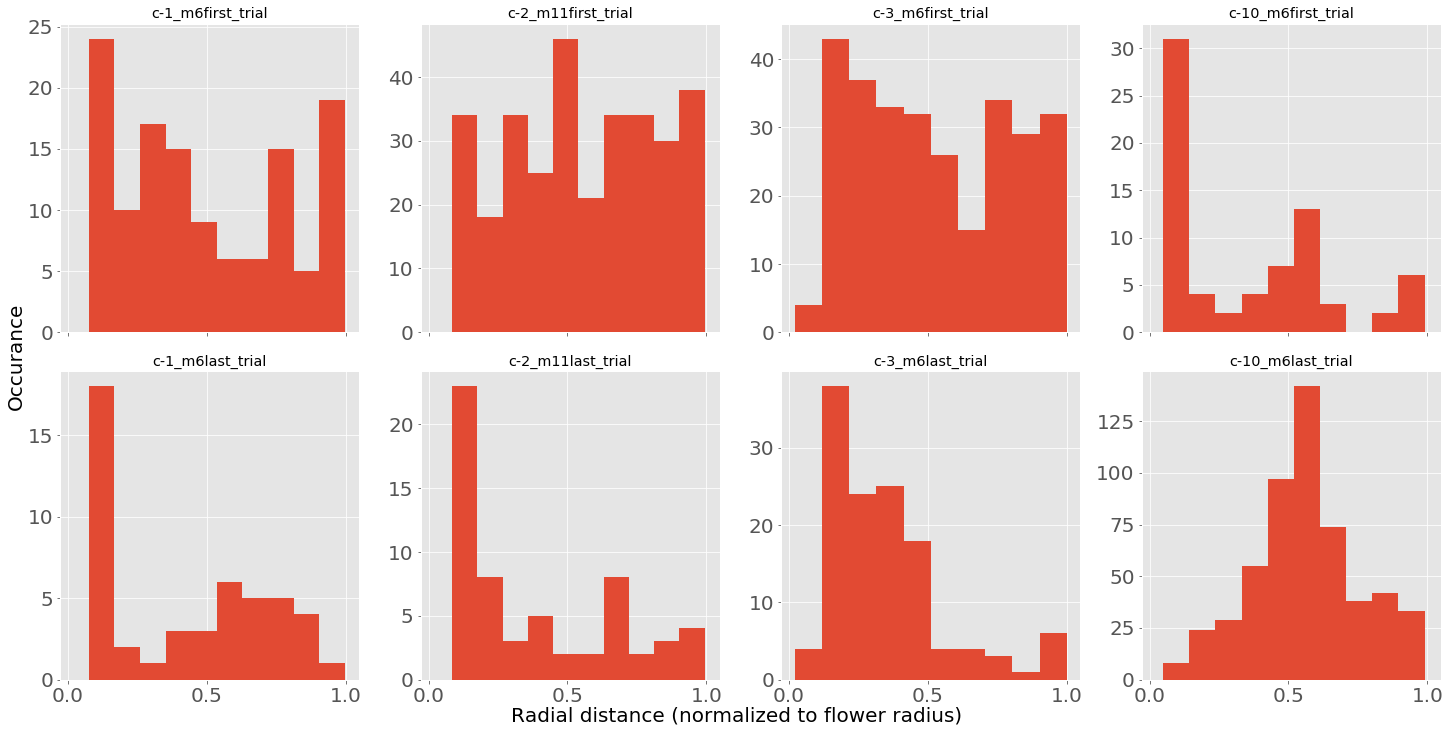

In [97]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,4, sharex = True, sharey = False, figsize = (20,10))

circle_params = pd.read_csv('./dataFolders/circle_parameters.csv')

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
namelist = list(frameInfo.Name.unique())

i = 0 # to align to correct subplot

for flower in shapes:
    moths = [name for name in namelist if flower in name]
    n = len(moths)
    
    r0 =[]
    rlast =[]
    for name in moths:
       # for i,name in zip(range(np.size(ax,1)), frameInfo.Name.unique()):

        # get the radius and theta tracks
        radius_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].radius.values
        useful_r_first = radius_first[~np.isnan(radius_first)]
        R = circle_params[circle_params.name == name].circ_radii.values[0]
        useful_r_first = useful_r_first[useful_r_first <= R]

        radius_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].radius.values
        useful_r_last = radius_last[~np.isnan(radius_last)]
        useful_r_last = useful_r_last[useful_r_last <= R]
        
        r0.extend(useful_r_first)
        rlast.extend(useful_r_last)
    
#     fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6))

    _,bins,_ = ax[0, i].hist(useful_r_first/R)
    ax[0, i].set_title(name + 'first_trial')
    ax[1, i].hist(useful_r_last/R, bins = bins)
    ax[1, i].set_title(name + 'last_trial')
    
    ax[0, i].tick_params('both', labelsize = 20)
    ax[1, i].tick_params('both', labelsize = 20)

    i+=1 # iterate to next column for next shape
    
fig.text(0.0, 0.5, 'Occurance',
         ha='center', va='center', rotation='vertical', fontsize = '20')
fig.text(0.5, 0.0, 'Radial distance (normalized to flower radius)',
         ha='center', va='center', rotation='horizontal', fontsize = '20')
plt.tight_layout()
# plt.savefig('./dataFolders/Figures/AllData_RadialDistanceHistorgram.svg')

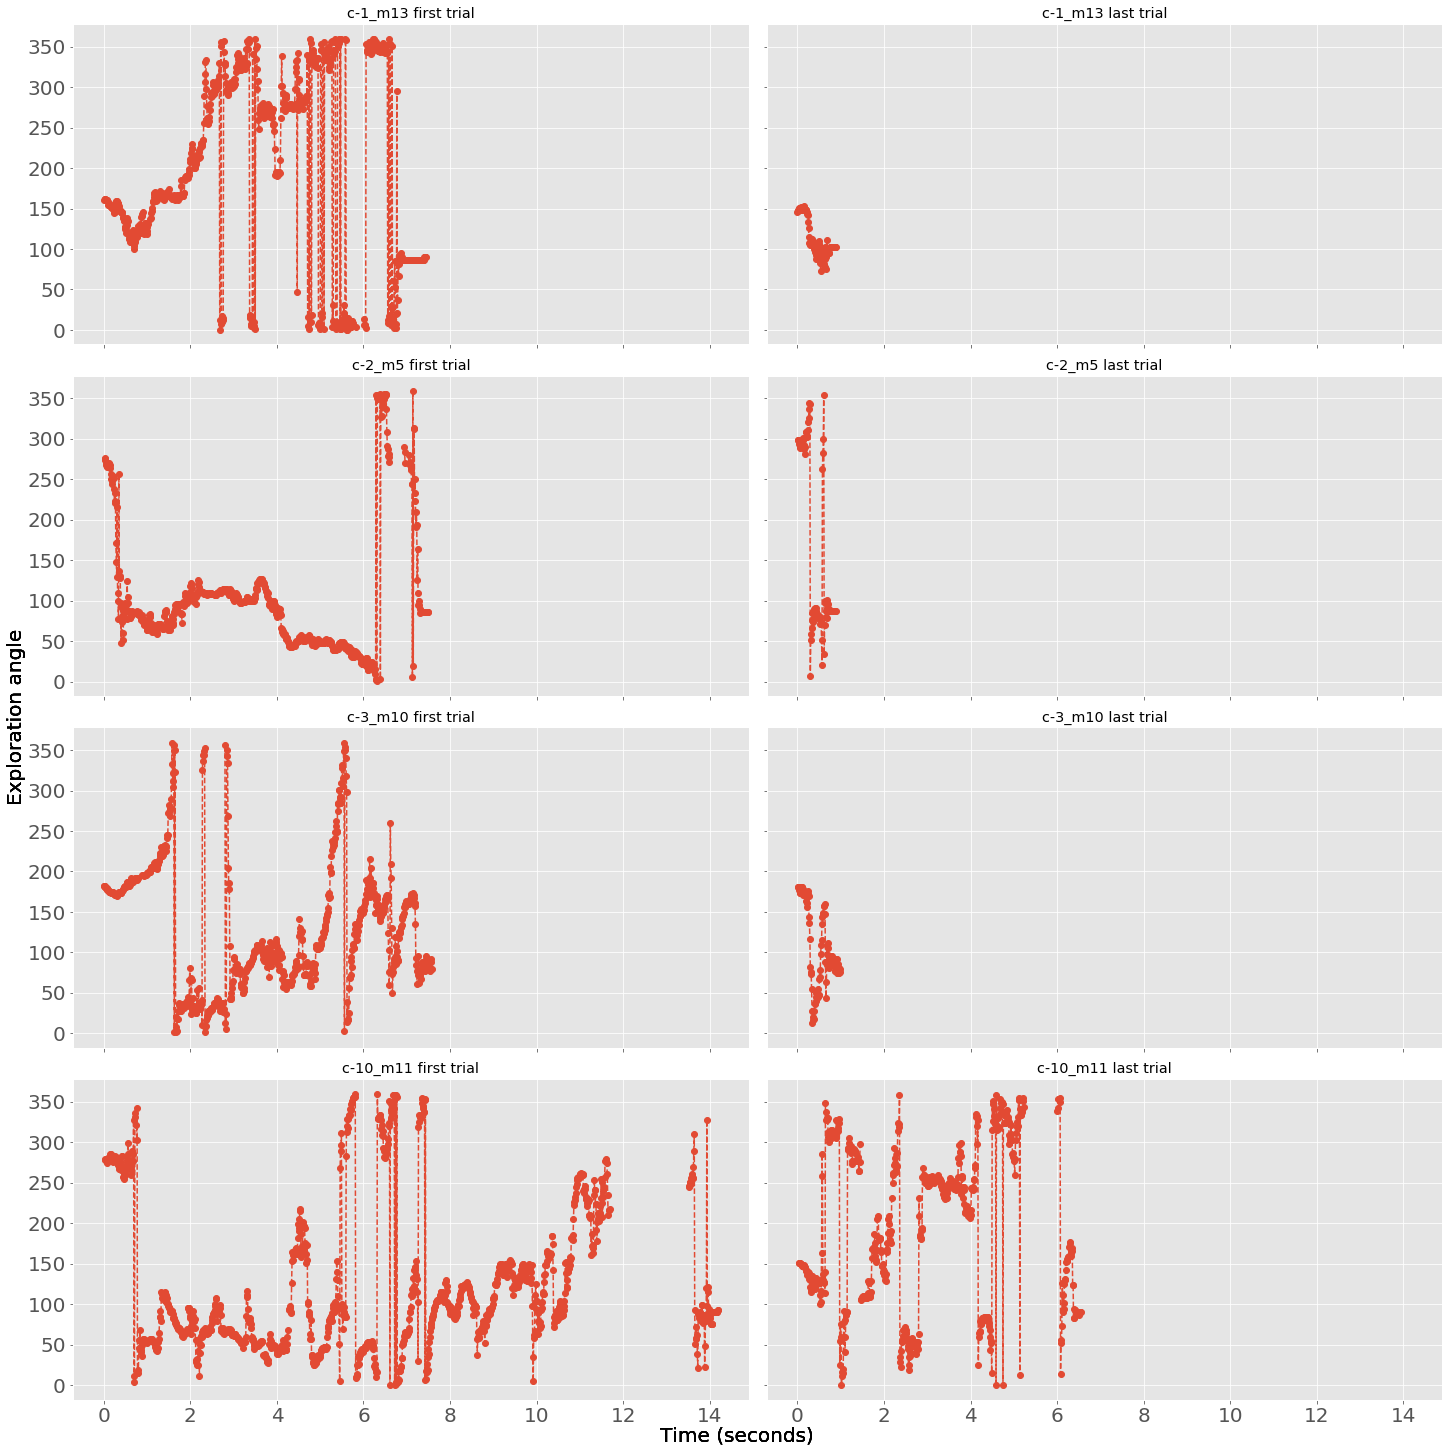

In [234]:
# plt.style.use('ggplot')
# fig, ax = plt.subplots(4,2, sharex = True, sharey = True, figsize = (20,20))

# for i,name in zip(range(len(ax)), frameInfo.Name.unique()):
    
#     # get the radius and theta tracks
#     theta_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')].theta.values
    
#     theta_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')].theta.values
    
#     # draw it NOW! :D (hehehehahahaha!!! :D )
   
#     t0 = np.arange(len(theta_first))*1/100
#     ax[i,0].plot(t0, theta_first, marker = "o", 
#                linestyle = "--")
    
#     ax[i,0].set_title(name + ' first trial')
                   
#     tlast = np.arange(len(theta_last))*1/100
#     ax[i,1].plot(tlast, theta_last, marker = "o", 
#                linestyle = "--")
#     ax[i,1].set_title(name + ' last trial')
    
# #     ax[i,0].set_yticks(np.arange(5))
# #     ax[i,0].set_yticklabels(['0', 'r', '2r', '3r', '4r'])
#     ax[i,0].tick_params('both', labelsize = 20)
#     ax[i,1].tick_params('both', labelsize = 20)
    
#     fig.text(0.0, 0.5, 'Exploration angle',
#              ha='center', va='center', rotation='vertical', fontsize = '20')
#     fig.text(0.5, 0.0, 'Time (seconds)',
#              ha='center', va='center', rotation='horizontal', fontsize = '20')
#     plt.tight_layout()
# #     plt.savefig('./dataFolders/Figures/ThetaOverTime.png')

# Draw the histogram for angle

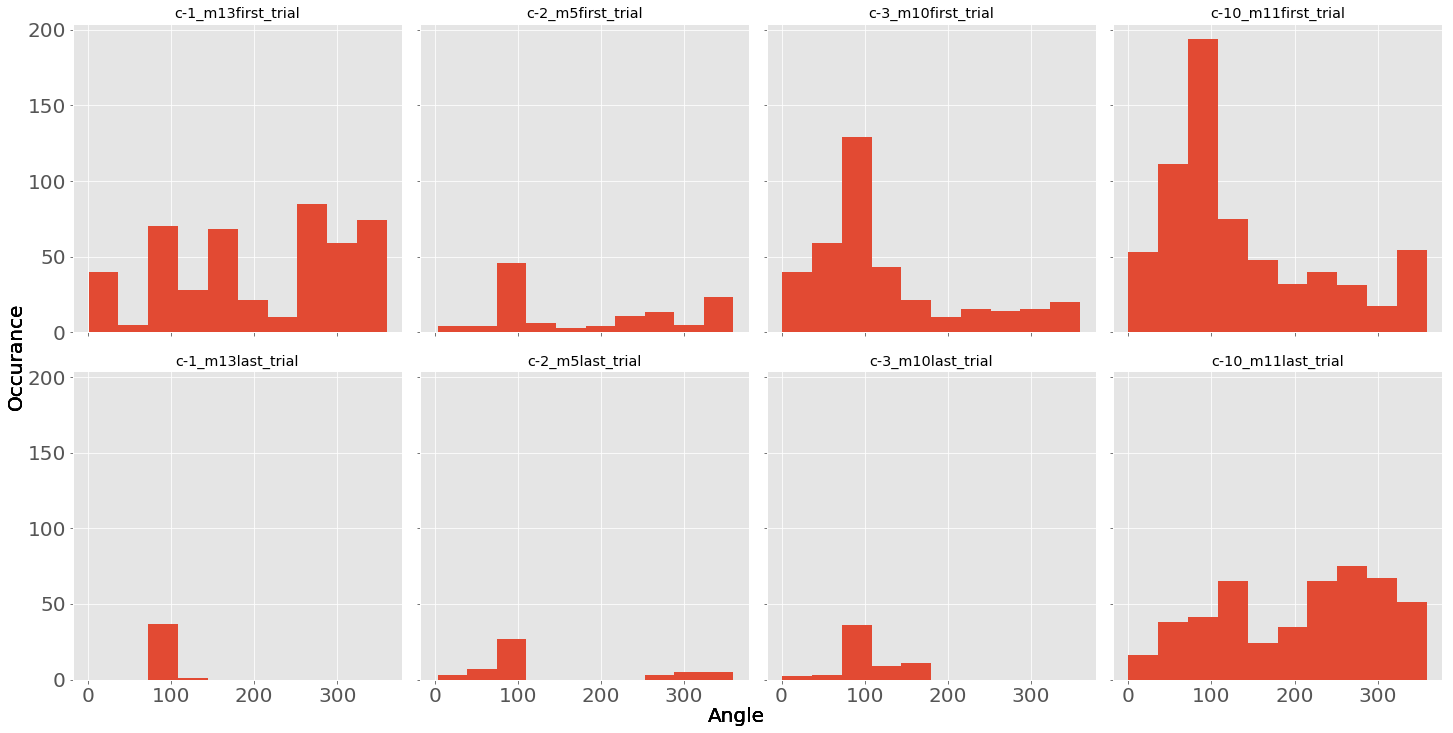

In [25]:
# plt.style.use('ggplot')
# fig, ax = plt.subplots(2,4, sharex = True, sharey = True, figsize = (20,10))

# for i,name in zip(range(np.size(ax,1)), frameInfo.Name.unique()):

#     # get the radius and theta tracks
#     useful_first = uber_df[(uber_df.name == name) & (uber_df.trial == '0')]
#     useful_first = useful_first[useful_first.radius <= R]
#     theta_first = useful_first.theta.values
#     hist_theta_first = theta_first[~np.isnan(theta_first)]
    
#     useful_last = uber_df[(uber_df.name == name) & (uber_df.trial == 'last')]
#     useful_last = useful_last[useful_last.radius <= R]
#     theta_last = useful_last.theta.values
#     hist_theta_last = theta_last[~np.isnan(theta_last)]
    
# #     _,bins,_=plt.hist(hist_theta_first)
#     _,bins,_ = ax[0, i].hist(hist_theta_first)
#     ax[0, i].set_title(name + 'first_trial')
#     ax[1, i].hist(hist_theta_last, bins = bins)
#     ax[1, i].set_title(name + 'last_trial')
    
#     ax[0, i].tick_params('both', labelsize = 20)
#     ax[1, i].tick_params('both', labelsize = 20)
    
#     fig.text(0.0, 0.5, 'Occurance',
#              ha='center', va='center', rotation='vertical', fontsize = '20')
#     fig.text(0.5, 0.0, 'Angle',
#              ha='center', va='center', rotation='horizontal', fontsize = '20')
#     plt.tight_layout()
# #     plt.savefig('./dataFolders/Figures/ThetaHistorgram.svg')